In [1]:
import numpy as np
from numpy.linalg import det, inv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from anneling_grad import GradientAnnealing

In [2]:
a1 = [1,0]; a2=[0,1];
A  = np.transpose([a1,a2]);

theta =  np.pi/4;
R = [ [ np.cos(theta), -np.sin(theta)], [ np.sin(theta),  np.cos(theta)] ];

b1 = np.sqrt(2)*np.dot(R,a1);  b2 =a2 #np.sqrt(2)*np.dot(R,a2); #a2
#b1 = [np.sqrt(2),0]; b2=[0,np.sqrt(2)];

B  = np.transpose([b1,b2]);

a = A#np.array([[0,1],[1,0]])
b = B#np.array([[0,5],[5,0]])

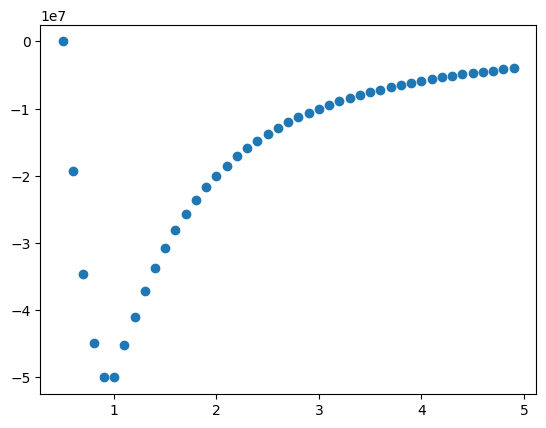

In [3]:
def at_sin(x, up =99999999):
    
    tr_x= (x + 0.5)
    
    if x<1:
        res = up*(1/(1+np.sqrt((x**2))) )* np.sin(tr_x*np.pi) +1/(x+0.00000000000001)
    else:
        res = (x-1)**2 -up*(1/(1+x**2))+1/(x+0.00000000000001)
    return res

X = [i*0.1 for i in range(0,50,1)]
Y= [at_sin(x) for x in X]

plt.scatter(X[5:],Y[5:])

In [4]:
# a = np.array([[0,1],[1,0]])
# b = np.sqrt(2)*np.array([[0,5],[5,0]])
eps = 0.0001

bond=10

def tAtB(params):
    tA = np.array([[params[0],params[1]],
                   [params[2],params[3]]])
    
    tB = np.dot(np.dot(tA,a), inv(b)) # tAa=tBb
    
    return tA, tB
          
def fit_fucntion(params , k_p=999):
          
        tA, tB= tAtB(params)
        tAa= np.dot(tA,a)
        tBb= np.dot(tB,b)
        
        # main condition
        zero_mat= tAa - tBb
        s=0
        for row in zero_mat:
            for e in row:
                s+=e*e
        
        # mimimum TA
        detTAa= det(tAa)*det(tAa) # minimum but biger than 0
        detTBb= det(tBb)*det(tBb)
        
        # TB integer 
        cons =9999999
        tB_con = 0  
        for row in tB:
            for e in row:
                tB_con += ((round(e)-e))*((round(e)-e)) # e*e
        tB_con = tB_con*cons
        
        tA_lenghth =((tA[0][0]**2+tA[0][1]**2)+(tA[1][0]**2+tA[1][1]**2) )*100
        
        
        f =  at_sin(detTAa)+ tB_con**2 +tA_lenghth
        #((1-detTAa)**2)*k_p + tB_con**2
        
        
        return f 

In [5]:
# Experiment settings

#Hyperparameters of the model
up = 99999999
model_par = {
    
    'initialTemp': 4, 
    'finalTemp': 0.0003,

    'beta': 10,
    'bounds': [[-2*bond,2*bond] for _ in range(4)],

    'nr_neighbours': 1,
    'step_size': 4,
    'gaussian_sd':3,
    
    'gradient_influence':0.45,
    'delta_p': 0.2,
    'g_step_size':7,
    'step_size': 2,
    
    'known_min': -up
    
}



#
input_size = 4 # since our function has one variable this is a trivial scenario.
start_point = [1,5,3,2]

# Experiment
experiment = GradientAnnealing(fit_fucntion ,start_point, model_par)

In [6]:
epochs= 40
history_book = experiment.evolve( epochs, prints_p=5)

temp:4|epoch:0|change:12941070.43365816|value:28622.850570895498
temp:4|epoch:5|change:100000150147697.5|value:-49987698.50000018
temp:4|epoch:10|change:257355899.01781633|value:-49987698.50000018
temp:4|epoch:15|change:100000150147697.5|value:-49987698.50000018
temp:4|epoch:20|change:100000150147697.5|value:-49987698.50000018
temp:4|epoch:25|change:118568297.04186267|value:-49987698.50000018
temp:4|epoch:30|change:100000150147697.5|value:-49987698.50000018
temp:4|epoch:35|change:100000150147697.5|value:-49987698.50000018
temp:0.0975609756097561|epoch:0|change:142232106.41593838|value:-49987698.50000018
temp:0.0975609756097561|epoch:5|change:100000150147697.5|value:-49987698.50000018
temp:0.0975609756097561|epoch:10|change:50199784.31587004|value:-49987698.50000018
temp:0.0975609756097561|epoch:15|change:50328022.09446876|value:-49987698.50000018
temp:0.0975609756097561|epoch:20|change:57312493.823504955|value:-49987698.50000018
temp:0.0975609756097561|epoch:25|change:50930190.21991806

temp:0.007130124777183602|epoch:20|change:49619018.50802529|value:-49999698.5
temp:0.007130124777183602|epoch:25|change:44120954.86764705|value:-49999698.5
temp:0.007130124777183602|epoch:30|change:49612618.50802529|value:-49999698.5
temp:0.007130124777183602|epoch:35|change:50462004.67208744|value:-49999698.5
temp:0.006655574043261232|epoch:0|change:100000150159697.5|value:-49999698.5
temp:0.006655574043261232|epoch:5|change:100000150159697.5|value:-49999698.5
temp:0.006655574043261232|epoch:10|change:50535394.334085375|value:-49999698.5
temp:0.006655574043261232|epoch:15|change:100000150159697.5|value:-49999698.5
temp:0.006655574043261232|epoch:20|change:49925122.52623576|value:-49999698.5
temp:0.006655574043261232|epoch:25|change:100000150159697.5|value:-49999698.5
temp:0.006655574043261232|epoch:30|change:100000150159697.5|value:-49999698.5
temp:0.006655574043261232|epoch:35|change:100000150159697.5|value:-49999698.5
temp:0.0062402496099844005|epoch:0|change:51055032.133636825|valu

temp:0.0035682426404995546|epoch:20|change:44117854.86764706|value:-49999698.5
temp:0.0035682426404995546|epoch:25|change:50396318.50225792|value:-49999698.5
temp:0.0035682426404995546|epoch:30|change:44118554.86764707|value:-49999698.5
temp:0.0035682426404995546|epoch:35|change:55772381.15376712|value:-49999698.5
temp:0.0034453057708871667|epoch:0|change:49926322.52623576|value:-49999698.5
temp:0.0034453057708871667|epoch:5|change:100000150159697.5|value:-49999698.5
temp:0.0034453057708871667|epoch:10|change:48782550.428184286|value:-49999698.5
temp:0.0034453057708871667|epoch:15|change:100000150159697.5|value:-49999698.5
temp:0.0034453057708871667|epoch:20|change:50050999.234839894|value:-49999698.5
temp:0.0034453057708871667|epoch:25|change:51065332.133636825|value:-49999698.5
temp:0.0034453057708871667|epoch:30|change:100000150159697.5|value:-49999698.5
temp:0.0034453057708871667|epoch:35|change:50043220.49083752|value:-49999698.5
temp:0.0033305578684429643|epoch:0|change:49841530.

temp:0.0023795359904818566|epoch:30|change:49982159.41237872|value:-49999698.5
temp:0.0023795359904818566|epoch:35|change:100000150159697.5|value:-49999698.5
temp:0.0023242300987797795|epoch:0|change:50021125.208685294|value:-49999698.5
temp:0.0023242300987797795|epoch:5|change:50106874.91348108|value:-49999698.5
temp:0.0023242300987797795|epoch:10|change:100000150159697.5|value:-49999698.5
temp:0.0023242300987797795|epoch:15|change:100000150159697.5|value:-49999698.5
temp:0.0023242300987797795|epoch:20|change:50106874.91348108|value:-49999698.5
temp:0.0023242300987797795|epoch:25|change:50461604.67208744|value:-49999698.5
temp:0.0023242300987797795|epoch:30|change:100000150159697.5|value:-49999698.5
temp:0.0023242300987797795|epoch:35|change:100000150159697.5|value:-49999698.5
temp:0.0022714366837024423|epoch:0|change:100000150159697.5|value:-49999698.5
temp:0.0022714366837024423|epoch:5|change:49926722.52623576|value:-49999698.5
temp:0.0022714366837024423|epoch:10|change:50334922.094

temp:0.0017536168347216138|epoch:30|change:25649759899.496075|value:-49999798.5
temp:0.0017536168347216138|epoch:35|change:44129554.86764706|value:-49999798.5
temp:0.0017233950883239987|epoch:0|change:50028021.350570895|value:-49999798.5
temp:0.0017233950883239987|epoch:5|change:49963170.547468945|value:-49999798.5
temp:0.0017233950883239987|epoch:10|change:49611918.50802529|value:-49999798.5
temp:0.0017233950883239987|epoch:15|change:50198684.31586986|value:-49999798.5
temp:0.0017233950883239987|epoch:20|change:49842530.13265175|value:-49999798.5
temp:0.0017233950883239987|epoch:25|change:51343948.66944229|value:-49999798.5
temp:0.0017233950883239987|epoch:30|change:50108074.91348108|value:-49999798.5
temp:0.0017233950883239987|epoch:35|change:50028421.350570895|value:-49999798.5
temp:0.0016941973739940707|epoch:0|change:25649759899.496075|value:-49999798.5
temp:0.0016941973739940707|epoch:5|change:49926422.52623576|value:-49999798.5
temp:0.0016941973739940707|epoch:10|change:49995659

temp:0.0013884068031933359|epoch:15|change:25649760699.496075|value:-49999798.5
temp:0.0013884068031933359|epoch:20|change:25649759899.496075|value:-49999798.5
temp:0.0013884068031933359|epoch:25|change:1300.0000000223517|value:-49999798.5
temp:0.0013884068031933359|epoch:30|change:25394719998.496006|value:-49999798.5
temp:0.0013884068031933359|epoch:35|change:50110874.91348108|value:-49999798.5
temp:0.0013693940431359125|epoch:0|change:49925622.52623576|value:-49999798.5
temp:0.0013693940431359125|epoch:5|change:26689217723.49621|value:-49999798.5
temp:0.0013693940431359125|epoch:10|change:1600.0|value:-49999798.5
temp:0.0013693940431359125|epoch:15|change:49926422.52623576|value:-49999798.5
temp:0.0013693940431359125|epoch:20|change:56772883.71885999|value:-49999798.5
temp:0.0013693940431359125|epoch:25|change:21343606227.49532|value:-49999798.5
temp:0.0013693940431359125|epoch:30|change:25649759799.496075|value:-49999798.5
temp:0.0013693940431359125|epoch:35|change:50463004.67208744

temp:0.0011490950876185003|epoch:5|change:25394719998.496006|value:-49999798.5
temp:0.0011490950876185003|epoch:10|change:27760012167.49637|value:-49999798.5
temp:0.0011490950876185003|epoch:15|change:49613018.50802529|value:-49999798.5
temp:0.0011490950876185003|epoch:20|change:25141590707.49602|value:-49999798.5
temp:0.0011490950876185003|epoch:25|change:49993159.25617378|value:-49999798.5
temp:0.0011490950876185003|epoch:30|change:50068997.648297966|value:-49999798.5
temp:0.0011490950876185003|epoch:35|change:53755996.82031081|value:-49999798.5
temp:0.001136040897472309|epoch:0|change:49981359.41237872|value:-49999798.5
temp:0.001136040897472309|epoch:5|change:50335422.09446858|value:-49999798.5
temp:0.001136040897472309|epoch:10|change:34878231927.49719|value:-49999798.5
temp:0.001136040897472309|epoch:15|change:50040920.49083752|value:-49999798.5
temp:0.001136040897472309|epoch:20|change:50006600.51|value:-49999798.5
temp:0.001136040897472309|epoch:25|change:50928790.21991788|valu

temp:0.0009898539965355103|epoch:30|change:50198384.31586986|value:-49999798.5
temp:0.0009898539965355103|epoch:35|change:50462104.67208744|value:-49999798.5
temp:0.0009801519235481493|epoch:0|change:24641025723.49594|value:-49999798.5
temp:0.0009801519235481493|epoch:5|change:49995659.25617378|value:-49999798.5
temp:0.0009801519235481493|epoch:10|change:50132831.17262629|value:-49999798.5
temp:0.0009801519235481493|epoch:15|change:50820376.04447464|value:-49999798.5
temp:0.0009801519235481493|epoch:20|change:49849630.13265175|value:-49999798.5
temp:0.0009801519235481493|epoch:25|change:25649759899.496075|value:-49999798.5
temp:0.0009801519235481493|epoch:30|change:50052299.234839894|value:-49999798.5
temp:0.0009801519235481493|epoch:35|change:23662399367.495827|value:-49999798.5
temp:0.0009706381946129574|epoch:0|change:26689217723.49621|value:-49999798.5
temp:0.0009706381946129574|epoch:5|change:25649760699.496075|value:-49999798.5
temp:0.0009706381946129574|epoch:10|change:272206607

temp:0.0008693762225603123|epoch:35|change:23904269502.495815|value:-49999798.5
temp:0.0008618832148243906|epoch:0|change:19199940987.494816|value:-49999798.5
temp:0.0008618832148243906|epoch:5|change:24147986323.495777|value:-49999798.5
temp:0.0008618832148243906|epoch:10|change:24641024823.49594|value:-49999798.5
temp:0.0008618832148243906|epoch:15|change:25649760199.496075|value:-49999798.5
temp:0.0008618832148243906|epoch:20|change:25649760199.496075|value:-49999798.5
temp:0.0008618832148243906|epoch:25|change:25649760199.496075|value:-49999798.5
temp:0.0008618832148243906|epoch:30|change:49613718.50802529|value:-49999798.5
temp:0.0008618832148243906|epoch:35|change:25906719998.49616|value:-49999798.5
temp:0.0008545182653279207|epoch:0|change:19199940987.494816|value:-49999798.5
temp:0.0008545182653279207|epoch:5|change:22249595123.49552|value:-49999798.5
temp:0.0008545182653279207|epoch:10|change:100000150012797.5|value:-49999798.5
temp:0.0008545182653279207|epoch:15|change:266892

temp:0.0007750435962022858|epoch:5|change:22713277147.495613|value:-49999798.5
temp:0.0007750435962022858|epoch:10|change:25649760199.496075|value:-49999798.5
temp:0.0007750435962022858|epoch:15|change:9999.999999821186|value:-49999798.5
temp:0.0007750435962022858|epoch:20|change:25141590707.49602|value:-49999798.5
temp:0.0007750435962022858|epoch:25|change:27220658323.496307|value:-49999798.5
temp:0.0007750435962022858|epoch:30|change:49926822.52623576|value:-49999798.5
temp:0.0007750435962022858|epoch:35|change:24393570974.49592|value:-49999798.5
temp:0.0007690828686790996|epoch:0|change:50067497.648297966|value:-49999798.5
temp:0.0007690828686790996|epoch:5|change:49982759.41237872|value:-49999798.5
temp:0.0007690828686790996|epoch:10|change:49612718.50802529|value:-49999798.5
temp:0.0007690828686790996|epoch:15|change:100000150002697.5|value:-49999798.5
temp:0.0007690828686790996|epoch:20|change:26689216823.49621|value:-49999798.5
temp:0.0007690828686790996|epoch:25|change:29426331

temp:0.0007041013906002458|epoch:35|change:25649760699.496075|value:-49999798.5
temp:0.000699178465303268|epoch:0|change:55317288.66242657|value:-49999798.5
temp:0.000699178465303268|epoch:5|change:50040620.49083752|value:-49999798.5
temp:0.000699178465303268|epoch:10|change:50051399.234839894|value:-49999798.5
temp:0.000699178465303268|epoch:15|change:25906719998.49616|value:-49999798.5
temp:0.000699178465303268|epoch:20|change:24147986323.495777|value:-49999798.5
temp:0.000699178465303268|epoch:25|change:26426439262.49617|value:-49999798.5
temp:0.000699178465303268|epoch:30|change:25141590707.49602|value:-49999798.5
temp:0.000699178465303268|epoch:35|change:53424773.25052898|value:-49999798.5
temp:0.0006943239021003291|epoch:0|change:50027221.350570895|value:-49999798.5
temp:0.0006943239021003291|epoch:5|change:50338322.09446858|value:-49999798.5
temp:0.0006943239021003291|epoch:10|change:49962270.547468945|value:-49999798.5
temp:0.0006943239021003291|epoch:15|change:26165609907.4961

temp:0.0006368412673141213|epoch:0|change:50000059.25617378|value:-49999798.5
temp:0.0006368412673141213|epoch:5|change:8499.999999955297|value:-49999798.5
temp:0.0006368412673141213|epoch:10|change:50002600.51|value:-49999798.5
temp:0.0006368412673141213|epoch:15|change:25649763399.496075|value:-49999798.5
temp:0.0006368412673141213|epoch:20|change:49993159.25617378|value:-49999798.5
temp:0.0006368412673141213|epoch:25|change:25649759799.496075|value:-49999798.5
temp:0.0006368412673141213|epoch:30|change:27760012167.49637|value:-49999798.5
temp:0.0006368412673141213|epoch:35|change:26689216823.49621|value:-49999798.5
temp:0.0006328112640404994|epoch:0|change:68990318.23006432|value:-49999798.5
temp:0.0006328112640404994|epoch:5|change:27220658323.496307|value:-49999798.5
temp:0.0006328112640404994|epoch:10|change:49615118.50802529|value:-49999798.5
temp:0.0006328112640404994|epoch:15|change:25906719998.49616|value:-49999798.5
temp:0.0006328112640404994|epoch:20|change:28307356499.4965

temp:0.0005847098377430197|epoch:20|change:26689217723.49621|value:-49999798.5
temp:0.0005847098377430197|epoch:25|change:50004100.51|value:-49999798.5
temp:0.0005847098377430197|epoch:30|change:20901155099.495155|value:-49999798.5
temp:0.0005847098377430197|epoch:35|change:26953954974.49635|value:-49999798.5
temp:0.0005813108559802352|epoch:0|change:50711157.11486932|value:-49999798.5
temp:0.0005813108559802352|epoch:5|change:26426439262.49617|value:-49999798.5
temp:0.0005813108559802352|epoch:10|change:62969591.784229055|value:-49999798.5
temp:0.0005813108559802352|epoch:15|change:100000150006297.5|value:-49999798.5
temp:0.0005813108559802352|epoch:20|change:51882269.14355056|value:-49999798.5
temp:0.0005813108559802352|epoch:25|change:25649760699.496075|value:-49999798.5
temp:0.0005813108559802352|epoch:30|change:25141590707.49602|value:-49999798.5
temp:0.0005813108559802352|epoch:35|change:48781450.428184286|value:-49999798.5
temp:0.0005779511631267155|epoch:0|change:50023625.20868

temp:0.0005375621556242437|epoch:10|change:51057932.133636825|value:-49999798.5
temp:0.0005375621556242437|epoch:15|change:49994059.25617378|value:-49999798.5
temp:0.0005375621556242437|epoch:20|change:52091399.54221353|value:-49999798.5
temp:0.0005375621556242437|epoch:25|change:50011268.84025463|value:-49999798.5
temp:0.0005375621556242437|epoch:30|change:27760012167.49637|value:-49999798.5
temp:0.0005375621556242437|epoch:35|change:51056732.133636825|value:-49999798.5
temp:0.0005346878759524125|epoch:0|change:49930022.52623576|value:-49999798.5
temp:0.0005346878759524125|epoch:5|change:25141590707.49602|value:-49999798.5
temp:0.0005346878759524125|epoch:10|change:26165609907.496178|value:-49999798.5
temp:0.0005346878759524125|epoch:15|change:50011568.84025463|value:-49999798.5
temp:0.0005346878759524125|epoch:20|change:24147986323.495777|value:-49999798.5
temp:0.0005346878759524125|epoch:25|change:50289325.15739239|value:-49999798.5
temp:0.0005346878759524125|epoch:30|change:5016287

temp:0.0004974505658500187|epoch:5|change:25649760199.496075|value:-49999798.5
temp:0.0004974505658500187|epoch:10|change:25649760699.496075|value:-49999798.5
temp:0.0004974505658500187|epoch:15|change:50814876.04447464|value:-49999798.5
temp:0.0004974505658500187|epoch:20|change:50072297.648297966|value:-49999798.5
temp:0.0004974505658500187|epoch:25|change:19825194174.49494|value:-49999798.5
temp:0.0004974505658500187|epoch:30|change:25649759899.496075|value:-49999798.5
temp:0.0004974505658500187|epoch:35|change:28307356499.496517|value:-49999798.5
temp:0.0004949882440292043|epoch:0|change:50536694.334085375|value:-49999798.5
temp:0.0004949882440292043|epoch:5|change:25649759899.496075|value:-49999798.5
temp:0.0004949882440292043|epoch:10|change:50002600.51|value:-49999798.5
temp:0.0004949882440292043|epoch:15|change:50026025.208685294|value:-49999798.5
temp:0.0004949882440292043|epoch:20|change:24147986323.495777|value:-49999798.5
temp:0.0004949882440292043|epoch:25|change:51200058.

temp:0.00046506220206952694|epoch:35|change:26426439262.49617|value:-49999798.5
temp:0.00046290938548779095|epoch:0|change:28032679998.496384|value:-49999798.5
temp:0.00046290938548779095|epoch:5|change:56255283.50040272|value:-49999798.5
temp:0.00046290938548779095|epoch:10|change:25649759799.496075|value:-49999798.5
temp:0.00046290938548779095|epoch:15|change:8500.000000178814|value:-49999798.5
temp:0.00046290938548779095|epoch:20|change:21793060023.495407|value:-49999798.5
temp:0.00046290938548779095|epoch:25|change:44119554.86764706|value:-49999798.5
temp:0.00046290938548779095|epoch:30|change:24147986323.495777|value:-49999798.5
temp:0.00046290938548779095|epoch:35|change:50013168.84025463|value:-49999798.5
temp:0.0004607764082478979|epoch:0|change:23184188499.495705|value:-49999798.5
temp:0.0004607764082478979|epoch:5|change:100000150003197.5|value:-49999798.5
temp:0.0004607764082478979|epoch:10|change:50028421.350570895|value:-49999798.5
temp:0.0004607764082478979|epoch:15|chang

temp:0.00043663355528872436|epoch:5|change:44118854.86764706|value:-49999798.5
temp:0.00043663355528872436|epoch:10|change:26689217723.49621|value:-49999798.5
temp:0.00043663355528872436|epoch:15|change:26165609907.496178|value:-49999798.5
temp:0.00043663355528872436|epoch:20|change:28862768347.496567|value:-49999798.5
temp:0.00043663355528872436|epoch:25|change:48784950.42818428|value:-49999798.5
temp:0.00043663355528872436|epoch:30|change:50205084.31586986|value:-49999798.5
temp:0.00043663355528872436|epoch:35|change:50051499.234839894|value:-49999798.5
temp:0.0004347353548527338|epoch:0|change:50002600.51|value:-49999798.5
temp:0.0004347353548527338|epoch:5|change:50002100.51|value:-49999798.5
temp:0.0004347353548527338|epoch:10|change:50461304.67208744|value:-49999798.5
temp:0.0004347353548527338|epoch:15|change:100000150002397.5|value:-49999798.5
temp:0.0004347353548527338|epoch:20|change:27220660723.496307|value:-49999798.5
temp:0.0004347353548527338|epoch:25|change:28032679998.4

temp:0.0004131804565644048|epoch:10|change:22713278647.495613|value:-49999798.5
temp:0.0004131804565644048|epoch:15|change:26426439262.49617|value:-49999798.5
temp:0.0004131804565644048|epoch:20|change:25649764699.496075|value:-49999798.5
temp:0.0004131804565644048|epoch:25|change:25141590707.49602|value:-49999798.5
temp:0.0004131804565644048|epoch:30|change:100000150000297.5|value:-49999798.5
temp:0.0004131804565644048|epoch:35|change:100000150002297.5|value:-49999798.5
temp:0.0004114803003806196|epoch:0|change:24641024823.49594|value:-49999798.5
temp:0.0004114803003806196|epoch:5|change:49931622.52623576|value:-49999798.5
temp:0.0004114803003806196|epoch:10|change:26165609907.496178|value:-49999798.5
temp:0.0004114803003806196|epoch:15|change:26426439262.49617|value:-49999798.5
temp:0.0004114803003806196|epoch:20|change:29998116023.49667|value:-49999798.5
temp:0.0004114803003806196|epoch:25|change:26689217723.49621|value:-49999798.5
temp:0.0004114803003806196|epoch:30|change:54107850

temp:0.00039058685675227064|epoch:35|change:25649760199.496075|value:-49999798.5
temp:0.000389067211360763|epoch:0|change:100000150002297.5|value:-49999798.5
temp:0.000389067211360763|epoch:5|change:48782650.428184286|value:-49999798.5
temp:0.000389067211360763|epoch:10|change:23422375998.495728|value:-49999798.5
temp:0.000389067211360763|epoch:15|change:25649760199.496075|value:-49999798.5
temp:0.000389067211360763|epoch:20|change:50622824.80891375|value:-49999798.5
temp:0.000389067211360763|epoch:25|change:24641025723.49594|value:-49999798.5
temp:0.000389067211360763|epoch:30|change:26426439262.49617|value:-49999798.5
temp:0.000389067211360763|epoch:35|change:50057499.234839894|value:-49999798.5
temp:0.0003875593450247073|epoch:0|change:50620124.80891375|value:-49999798.5
temp:0.0003875593450247073|epoch:5|change:27760012167.49637|value:-49999798.5
temp:0.0003875593450247073|epoch:10|change:22713277147.495613|value:-49999798.5
temp:0.0003875593450247073|epoch:15|change:49992859.25617

temp:0.0003676132708390778|epoch:0|change:50713057.11486932|value:-49999798.5
temp:0.0003676132708390778|epoch:5|change:49994059.25617378|value:-49999798.5
temp:0.0003676132708390778|epoch:10|change:3199.9999999925494|value:-49999798.5
temp:0.0003676132708390778|epoch:15|change:50002600.51|value:-49999798.5
temp:0.0003676132708390778|epoch:20|change:25649762299.496075|value:-49999798.5
temp:0.0003676132708390778|epoch:25|change:34237726099.497047|value:-49999798.5
temp:0.0003676132708390778|epoch:30|change:24641025723.49594|value:-49999798.5
temp:0.0003676132708390778|epoch:35|change:26426439262.49617|value:-49999798.5
temp:0.00036626682538229156|epoch:0|change:50000759.25617378|value:-49999798.5
temp:0.00036626682538229156|epoch:5|change:20901155099.495155|value:-49999798.5
temp:0.00036626682538229156|epoch:10|change:50109674.91348108|value:-49999798.5
temp:0.00036626682538229156|epoch:15|change:30578211027.49673|value:-49999798.5
temp:0.00036626682538229156|epoch:20|change:49983859.4

temp:0.0003496197884800285|epoch:10|change:53753196.82031081|value:-49999798.5
temp:0.0003496197884800285|epoch:15|change:50336622.09446858|value:-49999798.5
temp:0.0003496197884800285|epoch:20|change:24641025723.49594|value:-49999798.5
temp:0.0003496197884800285|epoch:25|change:49925922.52623576|value:-49999798.5
temp:0.0003496197884800285|epoch:30|change:49612718.50802529|value:-49999798.5
temp:0.0003496197884800285|epoch:35|change:49843330.13265175|value:-49999798.5
temp:0.00034840170716836567|epoch:0|change:50053499.234839894|value:-49999798.5
temp:0.00034840170716836567|epoch:5|change:50536994.334085375|value:-49999798.5
temp:0.00034840170716836567|epoch:10|change:49987759.41237872|value:-49999798.5
temp:0.00034840170716836567|epoch:15|change:27220658323.496307|value:-49999798.5
temp:0.00034840170716836567|epoch:20|change:44118354.86764706|value:-49999798.5
temp:0.00034840170716836567|epoch:25|change:50162874.50641248|value:-49999798.5
temp:0.00034840170716836567|epoch:30|change:2

temp:0.0003344201989800189|epoch:10|change:25649760199.496075|value:-49999798.5
temp:0.0003344201989800189|epoch:15|change:25649760199.496075|value:-49999798.5
temp:0.0003344201989800189|epoch:20|change:25649759899.496075|value:-49999798.5
temp:0.0003344201989800189|epoch:25|change:50335322.09446858|value:-49999798.5
temp:0.0003344201989800189|epoch:30|change:37530661499.497284|value:-49999798.5
temp:0.0003344201989800189|epoch:35|change:50010068.84025463|value:-49999798.5
temp:0.000333305557870178|epoch:0|change:24147986323.495777|value:-49999798.5
temp:0.000333305557870178|epoch:5|change:25649759899.496075|value:-49999798.5
temp:0.000333305557870178|epoch:10|change:24641024823.49594|value:-49999798.5
temp:0.000333305557870178|epoch:15|change:26689217723.49621|value:-49999798.5
temp:0.000333305557870178|epoch:20|change:29711189374.496586|value:-49999798.5
temp:0.000333305557870178|epoch:25|change:49983859.41237872|value:-49999798.5
temp:0.000333305557870178|epoch:30|change:56770083.71

temp:0.0003184459836000323|epoch:20|change:28862768347.496567|value:-49999798.5
temp:0.0003184459836000323|epoch:25|change:49925922.52623576|value:-49999798.5
temp:0.0003184459836000323|epoch:30|change:50713057.11486932|value:-49999798.5
temp:0.0003184459836000323|epoch:35|change:22713277147.495613|value:-49999798.5
temp:0.00031743512419649285|epoch:0|change:48781350.42818428|value:-49999798.5
temp:0.00031743512419649285|epoch:5|change:49981159.41237872|value:-49999798.5
temp:0.00031743512419649285|epoch:10|change:49995959.25617378|value:-49999798.5
temp:0.00031743512419649285|epoch:15|change:50019825.208685294|value:-49999798.5
temp:0.00031743512419649285|epoch:20|change:27220658323.496307|value:-49999798.5
temp:0.00031743512419649285|epoch:25|change:25649760699.496075|value:-49999798.5
temp:0.00031743512419649285|epoch:30|change:49984959.41237872|value:-49999798.5
temp:0.00031743512419649285|epoch:35|change:25649759899.496075|value:-49999798.5
temp:0.000316430662131161|epoch:0|change

temp:0.0003039282729275895|epoch:35|change:100000150002297.5|value:-49999798.5
temp:0.00030300734792818767|epoch:0|change:49993159.25617378|value:-49999798.5
temp:0.00030300734792818767|epoch:5|change:49613518.50802529|value:-49999798.5
temp:0.00030300734792818767|epoch:10|change:49612718.50802529|value:-49999798.5
temp:0.00030300734792818767|epoch:15|change:24641025723.49594|value:-49999798.5
temp:0.00030300734792818767|epoch:20|change:1600.0|value:-49999798.5
temp:0.00030300734792818767|epoch:25|change:25649760699.496075|value:-49999798.5
temp:0.00030300734792818767|epoch:30|change:26426439262.49617|value:-49999798.5
temp:0.00030300734792818767|epoch:35|change:100000150001797.5|value:-49999798.5
temp:0.000302091987010045|epoch:0|change:49617518.50802529|value:-49999798.5
temp:0.000302091987010045|epoch:5|change:22713277147.495613|value:-49999798.5
temp:0.000302091987010045|epoch:10|change:100.0|value:-49999798.5
temp:0.000302091987010045|epoch:15|change:25649761399.496075|value:-4999

In [7]:
solution = experiment.actual_solution
tA ,tB =tAtB(solution )
zero_mat= np.dot(tA,a) - np.dot(tB,b)
print("\n _____\n tA:\n",tA)
print("det:",det(tA))
print("\n _____\n tB:\n",tB)
print("det:",det(tB))
print("\n zero_mat:\n",zero_mat)



 _____
 tA:
 [[ 0 -1]
 [-1  0]]
det: -1.0

 _____
 tB:
 [[ 1. -1.]
 [-1.  0.]]
det: -0.9999999999999998

 zero_mat:
 [[0. 0.]
 [0. 0.]]


In [8]:
#StB=tB_round
def get_strain(tB):
    tBr= tB.copy()
    for i in range(len(tB)):
        for j in range(len(tB[0])):
            tBr[i][j]=round(tB[i][j])
    S =np.dot(tBr,inv(tB))
    return(S)

S= get_strain(tB)
print("Strain:",get_strain(tB))

Strain: [[ 1.00000000e+00 -2.22044605e-16]
 [ 0.00000000e+00  1.00000000e+00]]


Text(0.5, 1.0, 'Values')

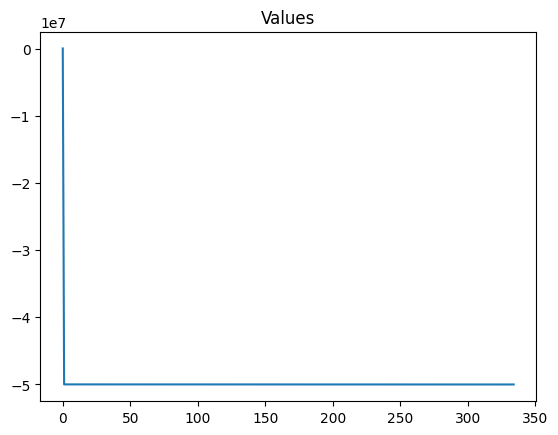

In [9]:
plt.plot(history_book['values'])
plt.title("Values")